In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12406418663_af20dc225f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6936225976_a91b60d8c2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/23891005905_17ce9e6936.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4413509121_a62879598

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')]

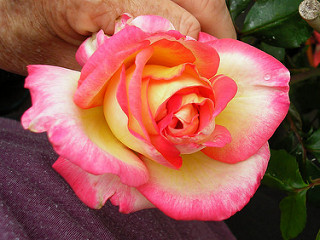

In [8]:
PIL.Image.open(str(roses[0]))

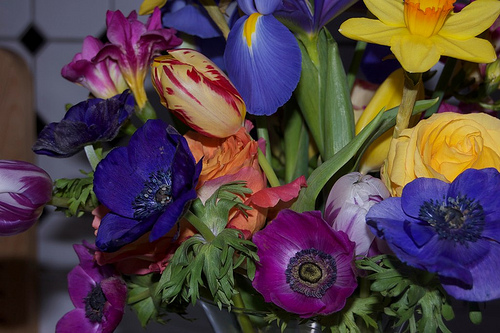

In [9]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    
}

In [11]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12406418663_af20dc225f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6936225976_a91b60d8c2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/23891005905_17ce9e6936.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4413509121_a62879598

In [12]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/9345273630_af3550031d.jpg'),
 PosixPath('datasets/flower_photos/daisy/3628485766_4ff937954a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3780380240_ef9ec1b737_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/144076848_57e1d662e3_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/11834945233_a53b7a92ac_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/6095817094_3a5b1d793d.jpg'),
 PosixPath('datasets/flower_photos/daisy/3706420943_66f3214862_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/16492248512_61a57dfec1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/1140299375_3aa7024466.jpg'),
 PosixPath('datasets/flower_photos/daisy/14591326135_930703dbed_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 PosixPath('datasets/flower_photos/daisy/754248840_95092de274.jpg'),
 PosixPath('datasets/flower_photos/daisy/7320089276_87b544e341.jpg'),
 Po

In [13]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4,
}

In [14]:
str(flowers_images_dict["roses"][0])

'datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'

In [15]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[102, 137, 171],
        [ 96, 132, 168],
        [ 89, 125, 165],
        ...,
        [ 13,  50,  48],
        [ 10,  42,  23],
        [ 34,  56,  38]],

       [[ 90, 123, 162],
        [ 84, 119, 159],
        [ 83, 118, 162],
        ...,
        [127, 166, 168],
        [ 74,  97,  92],
        [ 30,  38,  37]],

       [[ 86, 119, 164],
        [ 76, 110, 156],
        [ 69, 105, 153],
        ...,
        [104, 133, 142],
        [128, 154, 160],
        [ 49,  70,  85]],

       ...,

       [[ 90,  64, 104],
        [ 88,  61, 100],
        [ 96,  70, 106],
        ...,
        [  2,  66,  47],
        [  5,  59,  36],
        [  7,  68,  42]],

       [[ 93,  68, 106],
        [ 94,  68, 104],
        [ 96,  71, 105],
        ...,
        [ 10,  59,  39],
        [ 10,  60,  36],
        [  0,  71,  39]],

       [[ 84,  60,  95],
        [ 89,  63,  99],
        [ 86,  61,  95],
        ...,
        [ 12,  51,  30],
        [ 13,  61,  33],
        [  0,  82,  46]]

In [16]:
img.shape

(240, 320, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
X ,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [21]:
len(X_train)

2752

In [22]:
len(X_test)

918

In [23]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [24]:
X_train_scaled[0]

array([[[0.79607843, 0.87058824, 0.87058824],
        [0.67843137, 0.76470588, 0.75686275],
        [0.6745098 , 0.78431373, 0.77254902],
        ...,
        [0.01176471, 0.39215686, 0.25490196],
        [0.00784314, 0.38823529, 0.25098039],
        [0.01176471, 0.39215686, 0.24705882]],

       [[0.81960784, 0.88235294, 0.88627451],
        [0.71372549, 0.8       , 0.79215686],
        [0.7254902 , 0.81960784, 0.81176471],
        ...,
        [0.00392157, 0.39215686, 0.25882353],
        [0.01176471, 0.39215686, 0.25490196],
        [0.00784314, 0.39215686, 0.25098039]],

       [[0.81960784, 0.89019608, 0.89019608],
        [0.71764706, 0.79215686, 0.78823529],
        [0.66666667, 0.75294118, 0.74509804],
        ...,
        [0.00784314, 0.39215686, 0.27058824],
        [0.00784314, 0.39215686, 0.2627451 ],
        [0.00784314, 0.38823529, 0.25490196]],

       ...,

       [[0.29803922, 0.50980392, 0.51372549],
        [0.29803922, 0.50980392, 0.51372549],
        [0.30196078, 0

In [25]:
num_classes=5

model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

2021-12-23 16:26:52.375580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-23 16:26:52.474221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-23 16:26:52.475286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-23 16:26:52.476973: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/30


2021-12-23 16:26:59.496080: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


86/86 [==============================] - 9s 15ms/step - loss: 1.4368 - accuracy: 0.3975
Epoch 2/30
86/86 [==============================] - 1s 14ms/step - loss: 1.0273 - accuracy: 0.5945
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.8488 - accuracy: 0.6777
Epoch 4/30
86/86 [==============================] - 1s 14ms/step - loss: 0.6537 - accuracy: 0.7634
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.4610 - accuracy: 0.8412
Epoch 6/30
86/86 [==============================] - 1s 14ms/step - loss: 0.2913 - accuracy: 0.9048
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.1854 - accuracy: 0.9430
Epoch 8/30
86/86 [==============================] - 1s 14ms/step - loss: 0.1129 - accuracy: 0.9658
Epoch 9/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0858 - accuracy: 0.9746
Epoch 10/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0411 - accuracy: 0.9909
Epoch 11/30
86/86 [=

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 10ms/step - loss: 3.1280 - accuracy: 0.6100


[3.127990245819092, 0.6100217700004578]

In [27]:
predictions=model.predict(X_test_scaled)
predictions

array([[  4.0374784 ,   7.393125  , -11.882998  , -16.688532  ,
          7.3429136 ],
       [ -9.384122  ,  10.68332   ,  -4.1269984 ,  -0.84249437,
         -6.069215  ],
       [ -1.764511  ,  -0.9805555 ,  -0.3469264 ,  -5.5272713 ,
         -1.4171617 ],
       ...,
       [-14.447512  ,  -3.7068417 ,   5.183015  ,   2.1586294 ,
         -2.5919096 ],
       [ -0.89517564,  -0.25509351,  -2.869188  ,  -9.261059  ,
          5.1869974 ],
       [ -8.337247  , -10.931589  ,   1.9381541 ,  16.074844  ,
         -8.711042  ]], dtype=float32)

In [28]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.7567117e-02, 5.0354618e-01, 2.1405502e-09, 1.7518962e-11,
       4.7888669e-01], dtype=float32)>

In [29]:
np.argmax(score)

1

In [30]:
y_test[0]

1

In [31]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    
])

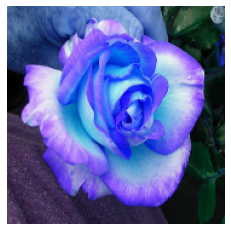

In [32]:
plt.axis('off')
plt.imshow(X[0])

In [33]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[ 54,  81, 130],
        [ 50,  77, 128],
        [ 43,  71, 128],
        ...,
        [124, 147, 157],
        [128, 151, 160],
        [153, 172, 177]],

       [[ 62,  86, 137],
        [ 52,  80, 132],
        [ 42,  71, 130],
        ...,
        [104, 123, 133],
        [105, 130, 139],
        [129, 154, 161]],

       [[ 69,  93, 143],
        [ 59,  88, 139],
        [ 47,  77, 135],
        ...,
        [111, 127, 137],
        [ 99, 122, 133],
        [113, 139, 147]],

       ...,

       [[ 77,  59,  90],
        [ 73,  55,  86],
        [ 68,  51,  84],
        ...,
        [  4,  32,  18],
        [  9,  20,  15],
        [ 11,  13,  13]],

       [[ 76,  57,  89],
        [ 70,  51,  84],
        [ 67,  49,  83],
        ...,
        [  5,  24,  15],
        [  9,  15,  14],
        [ 11,  14,  13]],

       [[ 72,  53,  85],
        [ 71,  51,  87],
        [ 70,  50,  87],
        ...,
        [  8,  19,  1

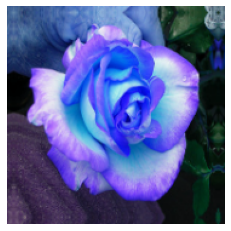

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [35]:
num_classes=5

model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

2021-12-23 16:28:32.440088: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1069977600 exceeds 10% of free system memory.
2021-12-23 16:28:33.609869: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/30
86/86 [==============================] - 2s 17ms/step - loss: 1.4691 - accuracy: 0.3634
Epoch 2/30
86/86 [==============================] - 1s 15ms/step - loss: 1.0996 - accuracy: 0.5574
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9619 - accuracy: 0.6166
Epoch 4/30
86/86 [==============================] - 1s 15ms/step - loss: 0.8571 - accuracy: 0.6599
Epoch 5/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7355 - accuracy: 0.7129
Epoch 6/30
86/86 [==============================] - 1s 15ms/step - loss: 0.6763 - accuracy: 0.7515
Epoch 7/30
86/86 [==============================] - 1s 15ms/step - loss: 0.6261 - accuracy: 0.7674
Epoch 8/30
86/86 [==============================] - 1s 14ms/step - loss: 0.5264 - accuracy: 0.8136
Epoch 9/30
86/86 [==============================] - 1s 15ms/step - loss: 0.5049 - accuracy: 0.8096
Epoch 10/30
86/86 [==============================] - 1s 17ms/step - loss: 0.4376 - accuracy: 0.8354
Epoch 11/

In [36]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 9ms/step - loss: 1.7205 - accuracy: 0.6765


[1.7204631567001343, 0.6764705777168274]